In [1]:
전이학습 (Transfer learning)
이미학습된 모델을 다른목적에 맞춰 조금만 고쳐서 사용하는 것 
, 전이학습은 사전학습된 모델을 새로운 작업에 적용하여 성능을 향상시키는 것에 중점을 둠
 - 전이학습할때는 Body 부분만 들고옴-> 이게 성능이 좋음  Header -> 새로고침. (이런모델이 있었슴. , 기본적인 전이학습 방법.)
   body는 이미지를 파악해서 "구조를 파악" , header는 그 구조의 글자가 무슨 글자인기 "구분하는 역할" ,을 함.
   이미지로 부터 구조를 파악하는게 이미 있기때문에 (숫자를 미리가르침) 그래서 header만 학습시킴.

    중반부에 있는 layer는 ㅎ 이 있다면 거기에 ㅎ 글자라는것의 흰색부분 검정색부분을 구분. 
    후반부는 어떤모양인지 구분. 
    
    
사전학습(pretraining)
, 사전학습은 모델을 학습하는 초기 단계로서 일반적인 특징을 추출하는 데 중점을 둠
(먼저숫자를 가르쳐놨으면 뭔가 바탕과 획을 구분하는 능력이 생김.)
 - 


같은뜻인데 관점이 다르다.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3 

In [3]:
pre_trained_model = InceptionV3(input_shape = (75,75,3) , include_top = False , weights = "imagenet")


In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [5]:
for layer in pre_trained_model.layers:
    layer.trainable = False # layer 동결 시키는 것

In [6]:
from tensorflow.keras import layers 
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import InceptionV3 

last_layer = pre_trained_model.get_layer("mixed7") # mixed7 은 이름. 
last_output = last_layer.output # last_layer.output 은 last_layer의 Body 임. 

x = Flatten()(last_output) 
x = Dense(64 , activation = "relu")(x)
outputs = Dense(10 , activation = "softmax")(x) # x = Dense(10 , activation = "softmax")(x)   마지막 출력층이라서 outputs라고 하고 10개의 노드. 

model = Model(pre_trained_model.input , outputs )
model.compile(optimizer = RMSprop(lr=0.0005), #compile -> 어떻게 학습을 할것이냐  , optimizer -> 할습을 뭘로 할거냐 (RMSprop 으로 함) ,  lr = learning rate 를 0.0005로  ㅡ  RMSprop 은 경사하강법의 한종류 
              loss="sparse_categorical_crossentropy", # 손실 함수 선택. 
              metrics = ["accuracy"]) # 정확도 선택 

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

C:\Users\PC\Carlos\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 conv2d_32 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_31[0][0]']          
                                                                                                  
 conv2d_37 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_36[0][0]']          
                                                                                                  
 batch_normalization_32 (BatchN  (None, 3, 3, 128)   384         ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_37 (BatchN  (None, 3, 3, 128)   384         ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [10]:
import cv2

x_train_75 = []
for image in x_train[:10000]:
    x_train_75.append(cv2.resize(image , (75,75)))
x_train_75 = np.array(x_train_75)

x_test_75 = []
for image in x_test_75[:2000]:
    x_test_75.append(cv2.resize(image , (75,75)))
x_test_75 = np.array(x_test_75)



# x_train_75 = np.resize(x_train,(len(x_train),75,75)) #또는  np.resize(x_train,(60000,75,75))
# x_test_75 = np.resize(x_test,(len(x_train),75,75))#또는 np.resize(x_test,(60000,75,75)) 
# # x_train_75 = np.expand_dims(x_train_75 , axis=-1)
# # x_test_75 = np.expand_dims(x_test_75 , axis=-1)

x_train_75 = np.stack([x_train_75,x_train_75,x_train_75], axis = -1) 

x_test_75 = np.stack([x_test_75,x_test_75,x_test_75], axis = -1) 

x_train_sc = x_train_75 /255
x_test_sc = x_test_75 /255

x_train_sc=x_train_sc.astype(np.float32)
x_test_sc=x_test_sc.astype(np.float32)

In [11]:
 
y_train_sc = y_train[:10000].copy()
y_test_sc = y_test[:2000].copy()
history = model.fit(x_train_sc , y_train_sc , epochs = 20 , validation_split= 0.2)

Epoch 1/20
250/250 [==============================] - 12s 26ms/step - loss: 0.3442 - accuracy: 0.9094 - val_loss: 0.1343 - val_accuracy: 0.9620
Epoch 2/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0987 - accuracy: 0.9715 - val_loss: 0.0728 - val_accuracy: 0.9800
Epoch 3/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0627 - accuracy: 0.9811 - val_loss: 0.0706 - val_accuracy: 0.9775
Epoch 4/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0753 - val_accuracy: 0.9740
Epoch 5/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.0688 - val_accuracy: 0.9795
Epoch 6/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0982 - val_accuracy: 0.9740
Epoch 7/20
250/250 [==============================] - 5s 19ms/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.0945 - val_accuracy: 0.969

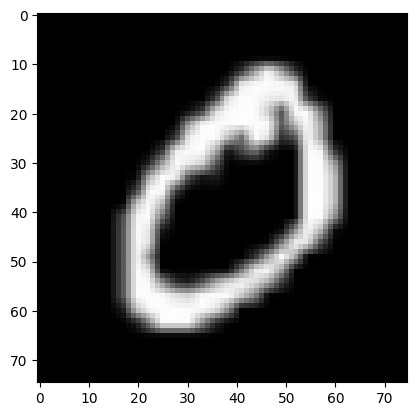

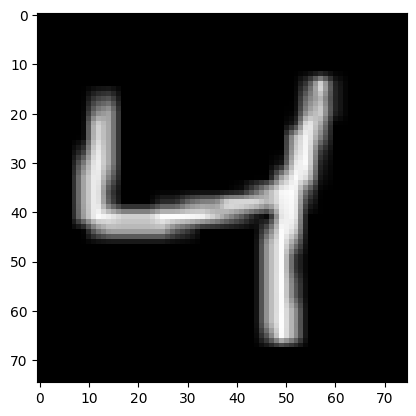

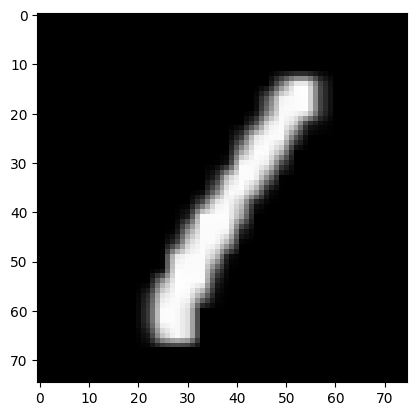

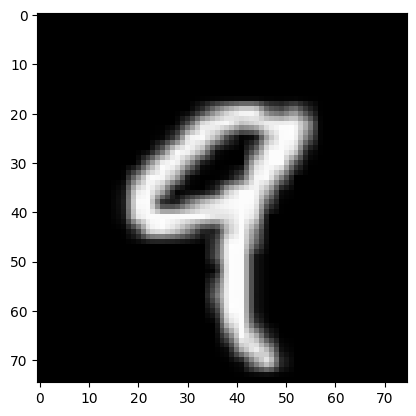

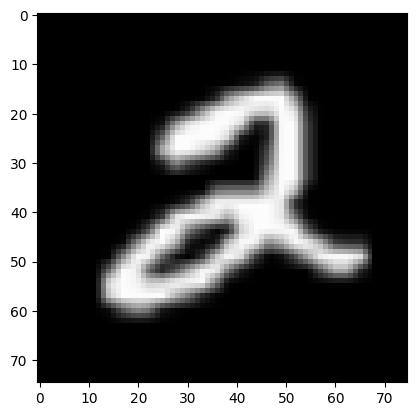

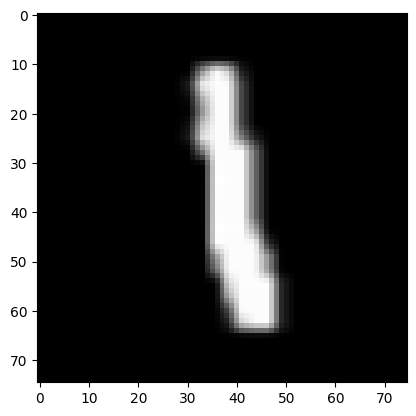

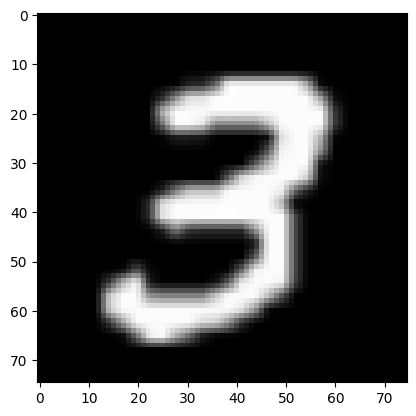

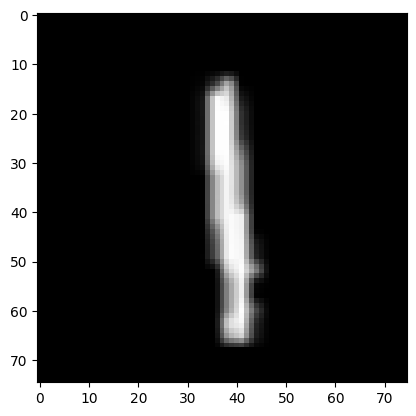

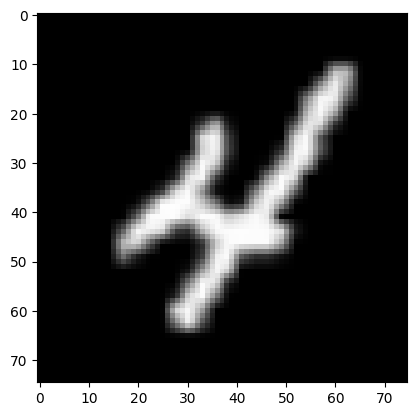

In [12]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

start_index = 1
end_index = 10
delay = 0.5

for i in range(start_index, end_index):
    plt.imshow(x_train_sc[i])
    plt.show()
    time.sleep(delay)  

In [13]:
history.history["loss"]  
# history.history["accuracy"]
# history.history["val_loss"]
#이렇게 리스트로 확인가능.! -> 그래프로 확인 가능! 

[0.3442450761795044,
 0.09865450859069824,
 0.06269927322864532,
 0.0452510267496109,
 0.032779376953840256,
 0.023569246754050255,
 0.02152043767273426,
 0.017130529507994652,
 0.012150446884334087,
 0.01022697426378727,
 0.008234472945332527,
 0.007706979755312204,
 0.0066001261584460735,
 0.004720523953437805,
 0.0036276092287153006,
 0.0025130610447376966,
 0.0031893488485366106,
 0.0021826676093041897,
 0.0023428192362189293,
 0.0020124271977692842]

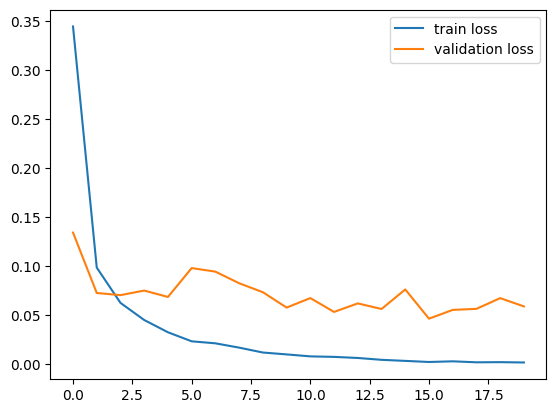

In [14]:
plt.figure()
plt.plot(history.history["loss"] , label ="train loss" )
plt.plot(history.history["val_loss"] , label = "validation loss")
plt.legend() 
plt.show()

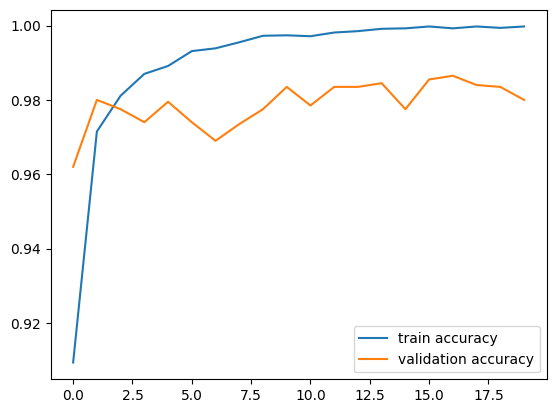

In [15]:
plt.figure()
plt.plot(history.history["accuracy"] , label ="train accuracy" )
plt.plot(history.history["val_accuracy"] , label = "validation accuracy")
plt.legend() 
plt.show()

In [ ]:
이런식으로 전이 학습이 됨. !  

In [ ]:
순환 신경망 (Recurrent Neural Network:RNN)
-> Transformer 의 시초 (요즘엔 순환신경망안씀)

영어 문자동 시퀀스(sequence) 고 한글도 시퀸스 이기 때문에
시퀀스 대 시퀀스 (sequence to sequence) 를 만들까하다가 만든게 순환신경망

순서가있는 입력을 갖는것. 앞에있는 입력이 선행되는 값. 

RNN기본구조
출력혹음 다음 계층으로 전달.
입력 -> 기억  -> 출력 -> 맥락   현재까지의 맥락 +현재맥락
 U       h       Wh       H  ->         HWh0 + HWh1        -> 그다음에 넘겨줄맥락 ... -> 계속진행.


In [ ]:
h(1) = fw(h(t-1) , x(t)) = tanh(Wh(t-1) + Ux(t)) 

무엇을 학습하는지 역할
U  -> 입력을 어느정도의 강도로 받아드릴건지 (입력이 온다고 고지곧대로 들으면 안되고 셸도 입력이 들어올때 입력정보를 얼마나 신뢰를 할지. 결정하는게 U , U가크면클수록 Ux가 큼)

Ux -> 크면 클수록 현재시점에 더강하게 작용함

h -> 다음 layer한테 내가 더중요한 문맥을 들고있어 라고 전달해줄것인가 를 전달하는 파라미터

H  -> 내가 가지고 있는 기억을 다음 step 까지 얼마나 보전할 것인가. 를 결정 

순환신경만에서 tanh 를 주로 사용함  하이퍼볼릭 탄젠트(hyperbolic tangent)
순환신경망에서 주로 tanh 사용하는 이유 2가지
1. Relu 사용하는경우 되먹임 구조 때문에 신호가 지나치게 커지는 오버플로우가 발생할수있지만 tanh 는 값이 특정범위를 넘지못하기때문에 이러한문제 피할수있음
2. 시그모으드에 비해 하이퍼볼릭 탄젠트가 사라지는 기울기(vanishing gradient)  문제를 더 잘 해결

In [ ]:
순환신경망계층 만들때 

유닛의 개수 -> m 
입력데이터를 유닛에 전달할 때 곱해지는 연결강도 U도 m 개
유닛의 값이 출력될때 곱해지는 연결강도 W 도 m 개 필요


순환신경망 유닛 m개가 다시 m 개의 유닛으로 연결 될 때는 m X m 개 의 유닛 쌍이 존재
연결강도 H 는 ->   m X m 
전체파라미타 수 -> m X m  +2m  ->> m(m+2)

